In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk


In [21]:
loans_income = pd.read_csv('../Csv/loans_income.csv')

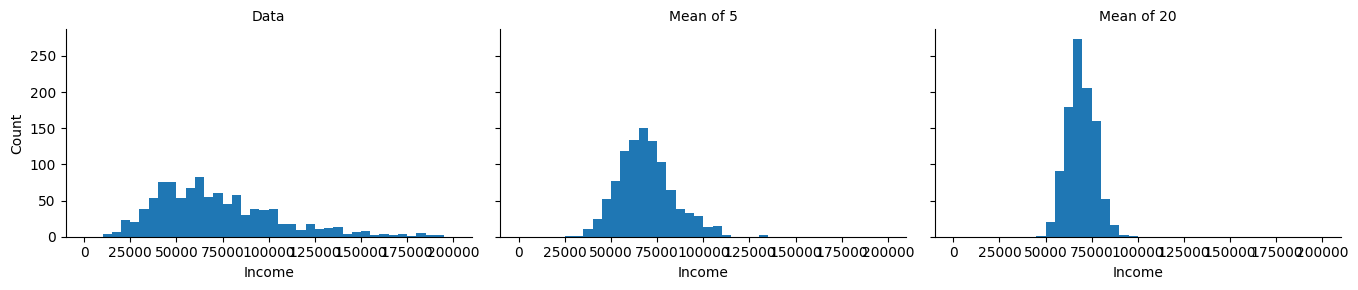

In [ ]:
#Creacion de un histograma de Distribucion muestral

sample_data = pd.DataFrame({
    'income': loans_income['x'].sample(1000).values,
    'type': 'Data'
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income['x'].sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5'

})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income['x'].sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20'

})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

g = sns.FacetGrid(results, col='type', col_wrap=3, height=3, aspect=1.5)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)

g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')
                  

In [26]:
#Crear un bootstrap con Python.

results = []
from sklearn.utils import resample
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample['x'].median())
results = pd.Series(results)
print('bootstrap Statistics:')
print(f'original: {loans_income["x"].median()}')
print(f'bias: {results.mean() - loans_income["x"].median()}')
print(f'std. error: {results.std()}')

bootstrap Statistics:
original: 62000.0
bias: -73.68099999999686
std. error: 220.7398997515908
